<a href="https://colab.research.google.com/github/yongkgu/Computer_Vision/blob/main/MachineVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Camera Calibration

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')




Mounted at /content/gdrive/


In [ ]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv_imshow

# Termination criteria (종료조건)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)  (물체에 존재하는 점들)
objp = np.zeros((6*8,3), np.float32) #초기화
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) #(8x6의 격자판 생성) **world coordinate 좌표

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('/content/gdrive/MyDrive/MachineVision/Kaka*.jpg')

for fname in images: #영상들을 하나씩 가져옴
  img = cv.imread(fname) # 읽어서 이미지로 저장
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #그레이스케일로 가져옴

  # Find the chess board corners 
  ret, corners = cv.findChessboardCorners(gray, (8,6), None) #8x6의 격자로 검출해라

  # If found, add object points, image points (after refining them)
  if ret == True: #격자의 점들을 ret에 할당
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria) #소수 점 픽셀 단위로 보다 더 정확하게 찾아라
    imgpoints.append(corners)
    # Draw and display the corners
    cv.drawChessboardCorners(img, (8,6), corners2, ret)
    cv_imshow(img)



In [ ]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [ ]:
ret

5.992297402525016

In [ ]:
mtx #내부변수 k (모든 영상에 동일한 값)

array([[2.92510244e+03, 0.00000000e+00, 1.57233554e+03],
       [0.00000000e+00, 2.99003974e+03, 2.54385015e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
tvecs # t 트랜슬래이션

[array([[ 2.02588701],
        [-6.24409473],
        [10.56965824]]), array([[-3.71200338],
        [-3.56983103],
        [12.13052641]]), array([[-4.27177642],
        [-5.15096576],
        [10.65846116]]), array([[-3.38514579],
        [-5.78901992],
        [12.2493098 ]]), array([[-0.7124294 ],
        [-5.68016779],
        [13.14041869]]), array([[-4.26856439],
        [-3.93481183],
        [11.04794431]]), array([[-3.93137033],
        [-4.42566327],
        [10.5797322 ]]), array([[-4.10196513e-03],
        [-7.07406252e+00],
        [ 1.34015291e+01]]), array([[-3.59667873],
        [-5.89496404],
        [11.6001634 ]]), array([[-2.50103364],
        [ 0.47276781],
        [10.7022531 ]])]

In [ ]:
rvecs #로테이션 R

[array([[-0.21703739],
        [-0.01977068],
        [ 1.48178645]]), array([[-0.30987532],
        [ 0.00091146],
        [ 0.00853121]]), array([[-0.07318169],
        [-0.11938947],
        [-0.0487254 ]]), array([[-0.09547355],
        [-0.0552014 ],
        [-0.05021178]]), array([[-0.40616319],
        [ 0.23828101],
        [ 0.88141785]]), array([[-0.14574814],
        [-0.24704085],
        [-0.46032697]]), array([[-0.29271545],
        [-0.1224149 ],
        [-0.07421402]]), array([[-0.20127322],
        [ 0.05308459],
        [ 0.90117633]]), array([[-0.28943758],
        [-0.01753558],
        [ 0.05127824]]), array([[-0.16764123],
        [-0.16098697],
        [-1.54981972]])]

##Simple AR

In [ ]:
axis = np.float32([[2,2,0], [2,5,0], [3,5,0], [3,2,0], [2,2,-5],[2,5,-5],[3,5,-5],[3,2,-5] ])

i=0
for fname in glob.glob ('/content/gdrive/MyDrive/MachineVision/Kaka*.jpg'):
  img = cv.imread(fname)
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, corners = cv.findChessboardCorners(gray, (8,6),None)
  if ret == True:
    # project 3D points to image plane
    imgpts, jac = cv.projectPoints(axis, rvecs[i], tvecs[i], mtx, dist)
    i=i+1
    img = draw(img,corners2,imgpts)
    cv_imshow(img)


In [ ]:
def draw(img, corners, imgpts): #  그려주는 함수
  imgpts = np.int32(imgpts).reshape(-1,2)
  
  # draw ground floor in green
  img = cv.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
  
  # draw pillars in blue color
  for i,j in zip(range(4),range(4,8)):
    img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255,0,0),3)
  
  # draw top layer in red color
  img = cv.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
  return img

### **Image Filtering**

## **Practice – Average filtering**


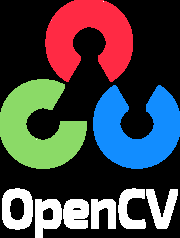

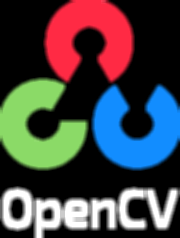

In [ ]:
# 이미지 블러처리
import cv2 as cv
from google.colab.patches import cv_imshow

img = cv.imread('/content/gdrive/MyDrive/MachineVision/opencv-logo-white.png') # 이미지 가져오기
blur = cv.blur(img, ksize=(5,5))  # 블러함수 사용 5*5커널 사용하여 필터링
cv_imshow(img) #원본 이미지
cv_imshow(blur) # 블러된 이미지


## **Image Sharpening**

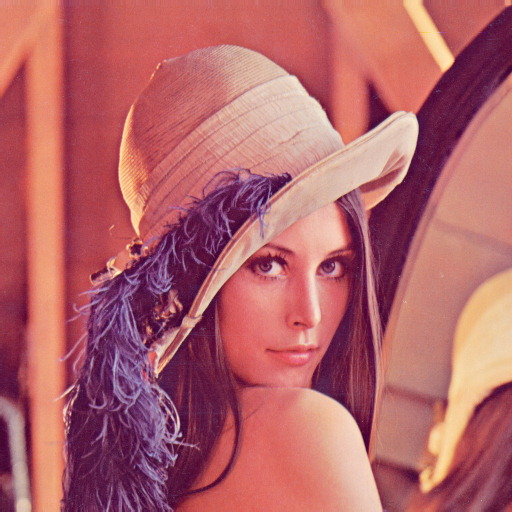

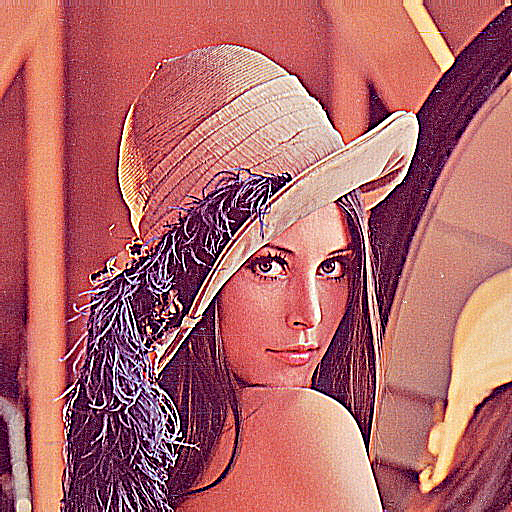

In [ ]:
#Image Sharpening
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow

img = cv.imread('/content/gdrive/MyDrive/MachineVision/lena.jpg') #이미지 업로드
blur = cv.blur(img, ksize=(5,5)) #블러함수 5*5 커널
detail = np.int32(img) - np.int32(blur) # img - blur 하여 디테일 만들기 (unsign int 8이 아닌 int 32로 처리 [0~255 보다 더 많은 수 처리 위해])
shapened_img = np.int32(img) + 5*detail #시그마 값 (5) * 디테일 곱한 값을 원본 이미지에 더해 샤프닝 이미지 완성
cv_imshow(img) #원본 이미지
cv_imshow(shapened_img) # 샤프닝된 이미지

## **Practice - Gaussian filtering**

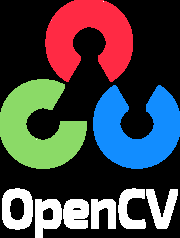

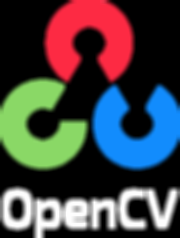

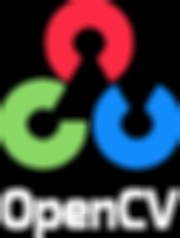

In [ ]:
import cv2 as cv
from google.colab.patches import cv_imshow
img = cv.imread('/content/gdrive/MyDrive/MachineVision/opencv-logo-white.png') # 영상 불러오기
blur1 = cv.GaussianBlur(img,ksize=(7,7),sigmaX=3) # 가우시안블러 수행 (이미지, 필터크기,시그마 크기)
blur2 = cv.GaussianBlur(img,ksize=(11,11),sigmaX=5) # 가우시안블러 수행 (이미지, 필터크기,시그마 크기)
# 결과 값
cv_imshow(img)
cv_imshow(blur1)
cv_imshow(blur2)

## **Practice - Median filtering**


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow

def addsaltandpeppernoise(image,ratio):  #솔트앤 패퍼 노이즈 만들어주는 함수 (영상,솔트앤패퍼 비율)
  row,col,ch = image.shape # 영상크기 불러오기
  out = np.copy(image) #원본 영상 카피
  # Salt mode
  num_salt = np.ceil(image.size * ratio) # 영상 픽셀 수에 래이쇼 곱한값 만큼 솔트 노이즈 생성
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape] # 노이즈 위치 랜덤 설정
  out[coords] = 255 # 하얀색 노이즈
  # Pepper mode
  num_pepper = np.ceil(image.size * ratio)
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  out[coords] = 0 # 검은색 노이즈
  return out


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


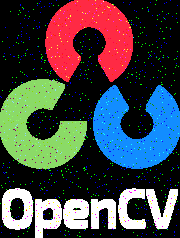

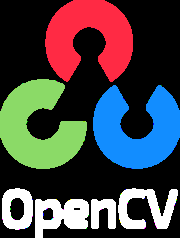

In [ ]:
img = cv.imread('/content/gdrive/MyDrive/MachineVision/opencv-logo-white.png') #영상 불러오기
img = addsaltandpeppernoise(img, ratio=0.01) #만든 함수에 0.01 적용
median_img = cv.medianBlur(img, ksize=3) #미디언 필터 수행 (이미지, 커널 크기)
# 결과
cv_imshow(img)
cv_imshow(median_img)